In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.date())
ginger_data = df[df['Commodity'] == 'Ginger']

ginger_data = ginger_data.sort_values(by='Date')
ginger_data.set_index('Date', inplace=True)
ginger_data = ginger_data['Average']

In [ ]:
# Split the data into training and testing sets (optional)
train = ginger_data[:-90]
test = ginger_data[-90:]

# Fit an ARIMA model
model = pm.auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Forecast the next 3 months (approximately 90 days)
n_days = 90
forecast, conf_int = model.predict(n_periods=n_days, return_conf_int=True)

# Create date range for the forecast
forecast_dates = pd.date_range(start=ginger_data.index[-1], periods=n_days + 1, closed='right')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ginger_data.index, ginger_data, label='Historical')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price of Ginger Over Time with Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Create lagged features for the last 30 days
def create_lagged_features(data, lag=30):
    df_lagged = pd.DataFrame()
    for i in range(lag):
        df_lagged[f'lag_{i+1}'] = data.shift(i+1)
    return df_lagged

In [7]:
# Prepare features and target
lagged_features = create_lagged_features(ginger_prices)
lagged_features['target'] = ginger_prices

# Drop NaN values
lagged_features = lagged_features.dropna()

# Split into training and testing sets
X = lagged_features.drop(columns=['target'])
y = lagged_features['target']

In [8]:
train_size = len(X) - 30
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 43.40279900123991


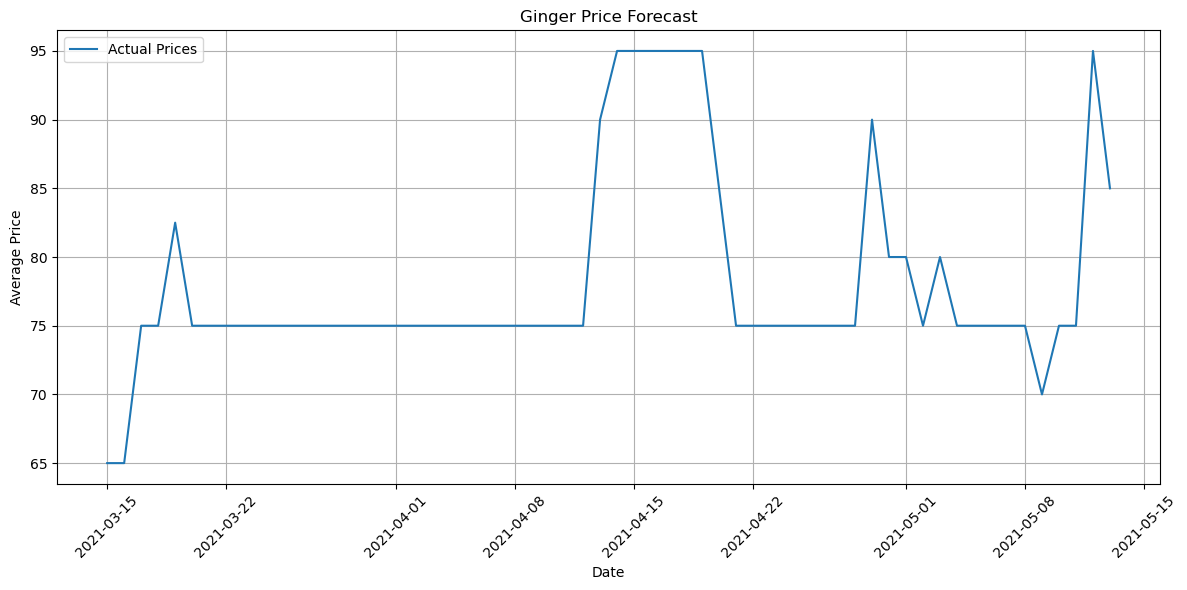

In [9]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(ginger_prices.index[-60:],
         ginger_prices[-60:],
         label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Ginger Price Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
example_query = {"history":
                 list(X.iloc[0].values)}

In [19]:
import numpy as np

model.predict(np.array(example_query['history']).reshape(1, -1))[0]

/Users/ivanstarovit/miniconda3/envs/beter/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


174.05402437993442

In [8]:
import pickle
# Save the model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
example_query = X.iloc[0].to_dict()